<a href="https://colab.research.google.com/github/sofe1204/colaboratory/blob/main/vezbi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# aud2


# aud3

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date

import requests
from bs4 import BeautifulSoup
from IPython.display import HTML
requests.packages.urllib3.disable_warnings()

%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
  snapshot_url = 'https://www.cnbc.com/finance/'
  snapshot = requests.get(snapshot_url)
  print(snapshot)
  soup = BeautifulSoup(snapshot.text,'html.parser')

  card_titles = soup.select('.Card-textContent')
  card_times = soup.select('.Card-time')
  card_classes = soup.select('.Card-eyebrow')
  print(card_titles[4].select_one('div').text)
  print(card_times[25].text + ' sofeski')
  print(card_classes[3].select_one('div').text)
  print(len(card_titles))
  print(len(card_times))
  print(len(card_classes))
  class_news = snapshot_url.split("/")[-2]
  class_news

<Response [200]>
It's time to buy the dip in this private equity stock, analysts sayJesse PoundFri, Oct 20th 2023
Wed, Oct 18th 2023 sofeski
Markets
34
34
23


'finance'

In [ ]:
def get_data(url):
  snapshot_url = url
  snaphost = requests.get(snapshot_url)
  soup = BeautifulSoup(snapshot.text,'html.parser')
  card_titles = soup.select('.Card-textContent')
  card_times = soup.select('.Card-time')
  card_classes = soup.select('.Card-eyebrow')
  titles=[]
  times=[]
  classes = []
  matrix = []

  class_news = url.split("/")[-2]
  for i in range(0,len(card_titles)):
    time = card_times[i].text ## 16min ago primer vraka
    d = time.split(" ")
    date_list=[]
    #print(time)
    if 'ago' in time or 'sec' in time or 'min' in time or 'hour' in time:
      today = date.today()
      date_list = [today.day,today.month] #sakame da zememe den i mesec
    else:
      date_list = [int(d[2][:-2]),datetime.strptime(d[1],'%b').month] # formatot Wed, Oct 18th 2023 , kje gi zeme denot 18 i mesec Oct
    redica = [card_titles[i].select_one('div').text, card_times[i].text, date_list[0],date_list[1]]
    if i<11: #card_titles i classes razlika
      redica.append('Top News ' + class_news)
    else:
      redica.append(card_classes[i-11].select_one('div').text)
    matrix.append(redica)
  df = pd.DataFrame(np.array(matrix),columns = ['Title','Date','Day','Month','Class'])
  return df






In [ ]:
df_finance = get_data('https://www.cnbc.com/finance/')


In [ ]:
df_finance

,Title,Date,Day,Month,Class
0,The 'No. 1 question' Ark Invest’s Cathie Wood ...,"Sat, Oct 21st 2023",21,10,Top News finance
1,Amazon falls ahead of next week’s earnings res...,"Fri, Oct 20th 2023",20,10,Top News finance
2,Stocks making the biggest moves midday: SolarE...,"Fri, Oct 20th 2023",20,10,Top News finance
3,Regional bank shares drop as lenders warn of m...,"Fri, Oct 20th 2023",20,10,Top News finance
4,It's time to buy the dip in this private equit...,"Fri, Oct 20th 2023",20,10,Top News finance
5,Market InsiderStocks making the biggest premar...,"Fri, Oct 20th 2023",20,10,Top News finance
6,TechCoinbase 'confident' U.S. bitcoin ETF will...,"Sat, Oct 21st 2023",21,10,Top News finance
7,"TechAfter blockbuster Microsoft deal, gaming g...","Fri, Oct 20th 2023",20,10,Top News finance
8,MarketsTurbine troubles have sent wind energy ...,"Fri, Oct 20th 2023",20,10,Top News finance
9,Market InsiderStocks making the biggest moves ...,"Thu, Oct 19th 2023",19,10,Top News finance


In [ ]:
df_health= get_data('https://www.cnbc.com/health-and-science')
df_health

,Title,Date,Day,Month,Class
0,The 'No. 1 question' Ark Invest’s Cathie Wood ...,"Sat, Oct 21st 2023",21,10,Top News www.cnbc.com
1,Amazon falls ahead of next week’s earnings res...,"Fri, Oct 20th 2023",20,10,Top News www.cnbc.com
2,Stocks making the biggest moves midday: SolarE...,"Fri, Oct 20th 2023",20,10,Top News www.cnbc.com
3,Regional bank shares drop as lenders warn of m...,"Fri, Oct 20th 2023",20,10,Top News www.cnbc.com
4,It's time to buy the dip in this private equit...,"Fri, Oct 20th 2023",20,10,Top News www.cnbc.com
5,Market InsiderStocks making the biggest premar...,"Fri, Oct 20th 2023",20,10,Top News www.cnbc.com
6,TechCoinbase 'confident' U.S. bitcoin ETF will...,"Sat, Oct 21st 2023",21,10,Top News www.cnbc.com
7,"TechAfter blockbuster Microsoft deal, gaming g...","Fri, Oct 20th 2023",20,10,Top News www.cnbc.com
8,MarketsTurbine troubles have sent wind energy ...,"Fri, Oct 20th 2023",20,10,Top News www.cnbc.com
9,Market InsiderStocks making the biggest moves ...,"Thu, Oct 19th 2023",19,10,Top News www.cnbc.com


In [ ]:
df_finance.to_csv('/content/csv_files/AUD3_Finance.csv', index = False )

In [ ]:
df_health.to_csv('/content/csv_files/AUD3_Health.csv', index = False )

In [ ]:
df_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Title   34 non-null     object        
 1   Date    34 non-null     object        
 2   Day     34 non-null     object        
 3   Month   34 non-null     datetime64[ns]
 4   Class   34 non-null     object        
dtypes: datetime64[ns](1), object(4)
memory usage: 1.5+ KB


In [ ]:

df_health.head()


,Title,Date,Day,Month,Class
0,The 'No. 1 question' Ark Invest’s Cathie Wood ...,"Sat, Oct 21st 2023",21,10,Top News www.cnbc.com
1,Amazon falls ahead of next week’s earnings res...,"Fri, Oct 20th 2023",20,10,Top News www.cnbc.com
2,Stocks making the biggest moves midday: SolarE...,"Fri, Oct 20th 2023",20,10,Top News www.cnbc.com
3,Regional bank shares drop as lenders warn of m...,"Fri, Oct 20th 2023",20,10,Top News www.cnbc.com
4,It's time to buy the dip in this private equit...,"Fri, Oct 20th 2023",20,10,Top News www.cnbc.com


In [ ]:
df_top_news = pd.concat([df_finance[df_finance['Class'] == 'Top News finance'],df_health[df_health['Class'] == 'Top News www.cnbc.com']]) # konkataniranje

In [ ]:
df_top_news

,Title,Date,Day,Month,Class
0,The 'No. 1 question' Ark Invest’s Cathie Wood ...,"Sat, Oct 21st 2023",21,10,Top News finance
1,Amazon falls ahead of next week’s earnings res...,"Fri, Oct 20th 2023",20,10,Top News finance
2,Stocks making the biggest moves midday: SolarE...,"Fri, Oct 20th 2023",20,10,Top News finance
3,Regional bank shares drop as lenders warn of m...,"Fri, Oct 20th 2023",20,10,Top News finance
4,It's time to buy the dip in this private equit...,"Fri, Oct 20th 2023",20,10,Top News finance
5,Market InsiderStocks making the biggest premar...,"Fri, Oct 20th 2023",20,10,Top News finance
6,TechCoinbase 'confident' U.S. bitcoin ETF will...,"Sat, Oct 21st 2023",21,10,Top News finance
7,"TechAfter blockbuster Microsoft deal, gaming g...","Fri, Oct 20th 2023",20,10,Top News finance
8,MarketsTurbine troubles have sent wind energy ...,"Fri, Oct 20th 2023",20,10,Top News finance
9,Market InsiderStocks making the biggest moves ...,"Thu, Oct 19th 2023",19,10,Top News finance


In [ ]:
df_top_news.sort_values('Day') # sortiranje po den RASTECKI

,Title,Date,Day,Month,Class
10,Tesla tumbles after posting quarterly results....,"Thu, Oct 19th 2023",19,10,Top News finance
9,Market InsiderStocks making the biggest moves ...,"Thu, Oct 19th 2023",19,10,Top News www.cnbc.com
9,Market InsiderStocks making the biggest moves ...,"Thu, Oct 19th 2023",19,10,Top News finance
10,Tesla tumbles after posting quarterly results....,"Thu, Oct 19th 2023",19,10,Top News www.cnbc.com
4,It's time to buy the dip in this private equit...,"Fri, Oct 20th 2023",20,10,Top News finance
8,MarketsTurbine troubles have sent wind energy ...,"Fri, Oct 20th 2023",20,10,Top News www.cnbc.com
7,"TechAfter blockbuster Microsoft deal, gaming g...","Fri, Oct 20th 2023",20,10,Top News www.cnbc.com
5,Market InsiderStocks making the biggest premar...,"Fri, Oct 20th 2023",20,10,Top News www.cnbc.com
4,It's time to buy the dip in this private equit...,"Fri, Oct 20th 2023",20,10,Top News www.cnbc.com
3,Regional bank shares drop as lenders warn of m...,"Fri, Oct 20th 2023",20,10,Top News www.cnbc.com


In [ ]:
df = pd.concat([df_finance,df_health])
df.to_csv('/content/csv_files/data_concat_finance_health.csv', index = False)

EDA


In [ ]:
df_health.median()

Day      19.0
Month    10.0
dtype: float64

In [ ]:
df_finance.median()


Day      19.0
Month    10.0
dtype: float64

In [ ]:
df = pd.read_csv('/content/csv_files/data_concat_finance_health.csv')
df.median()

Day      19.0
Month    10.0
dtype: float64

In [ ]:
df.min()

Title     Bank of America says this brokerage stock is ...
Date                                    Fri, Oct 20th 2023
Day                                                     17
Month                                                   10
Class                                      Federal Reserve
dtype: object

In [ ]:
df.mean()

Day      18.941176
Month    10.000000
dtype: float64

In [ ]:
df.std()

Day      1.063399
Month    0.000000
dtype: float64

In [ ]:
df.quantile([.1,.25,.5,.75],axis=0) # axis=0 , po redici

,Day,Month
0.10,17.0,10.0
0.25,18.0,10.0
0.50,19.0,10.0
0.75,20.0,10.0


In [ ]:
from scipy import stats

In [ ]:
df.iloc[:5,2:4] # redici i koloni

,Day,Month
0,21,10
1,20,10
2,20,10
3,20,10
4,20,10


In [ ]:
stats.gmean(df.iloc[:2,2:4],axis=0)

array([20.49390153, 10.        ])

Za stringovi
, preku histogram kazuva kakva distribucija


In [ ]:
df.Class.value_counts() # broime kolku klasi imame

Market Insider           18
Top News finance         11
Top News www.cnbc.com    11
Tech                      8
Personal Finance          6
Federal Reserve           6
Markets                   4
Finance                   4
Name: Class, dtype: int64

In [ ]:
%matplotlib inline


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Top News finance'),
  Text(1, 0, 'Market Insider'),
  Text(2, 0, 'Tech'),
  Text(3, 0, 'Markets'),
  Text(4, 0, 'Personal Finance'),
  Text(5, 0, 'Federal Reserve'),
  Text(6, 0, 'Finance'),
  Text(7, 0, 'Top News www.cnbc.com')])

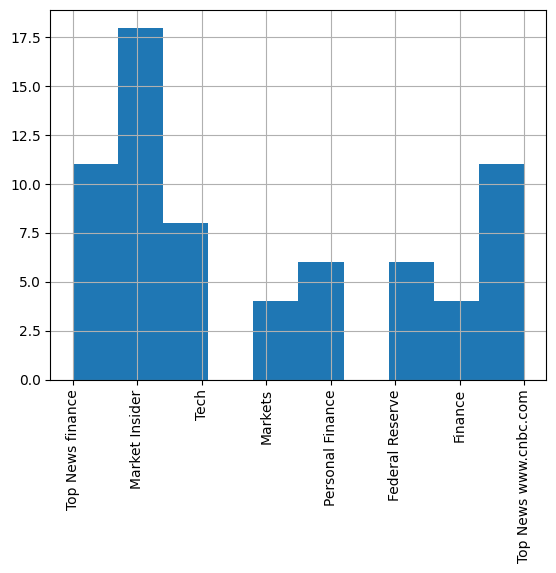

In [ ]:
df['Class'].hist()
plt.xticks(rotation=90) # rotacija na dolnite vrednosti za da ne se preklopuvaat

array([[<Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'Month'}>]], dtype=object)

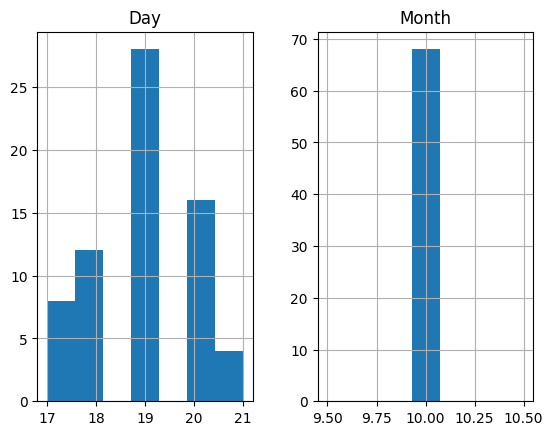

In [ ]:
df.hist(bins= 7) # sekoj den e kako vo bin , ako imame malce binovi moze da dojde do spojuvanje i preklopuvanje na razlicni denovi vo ist bin

<Axes: >

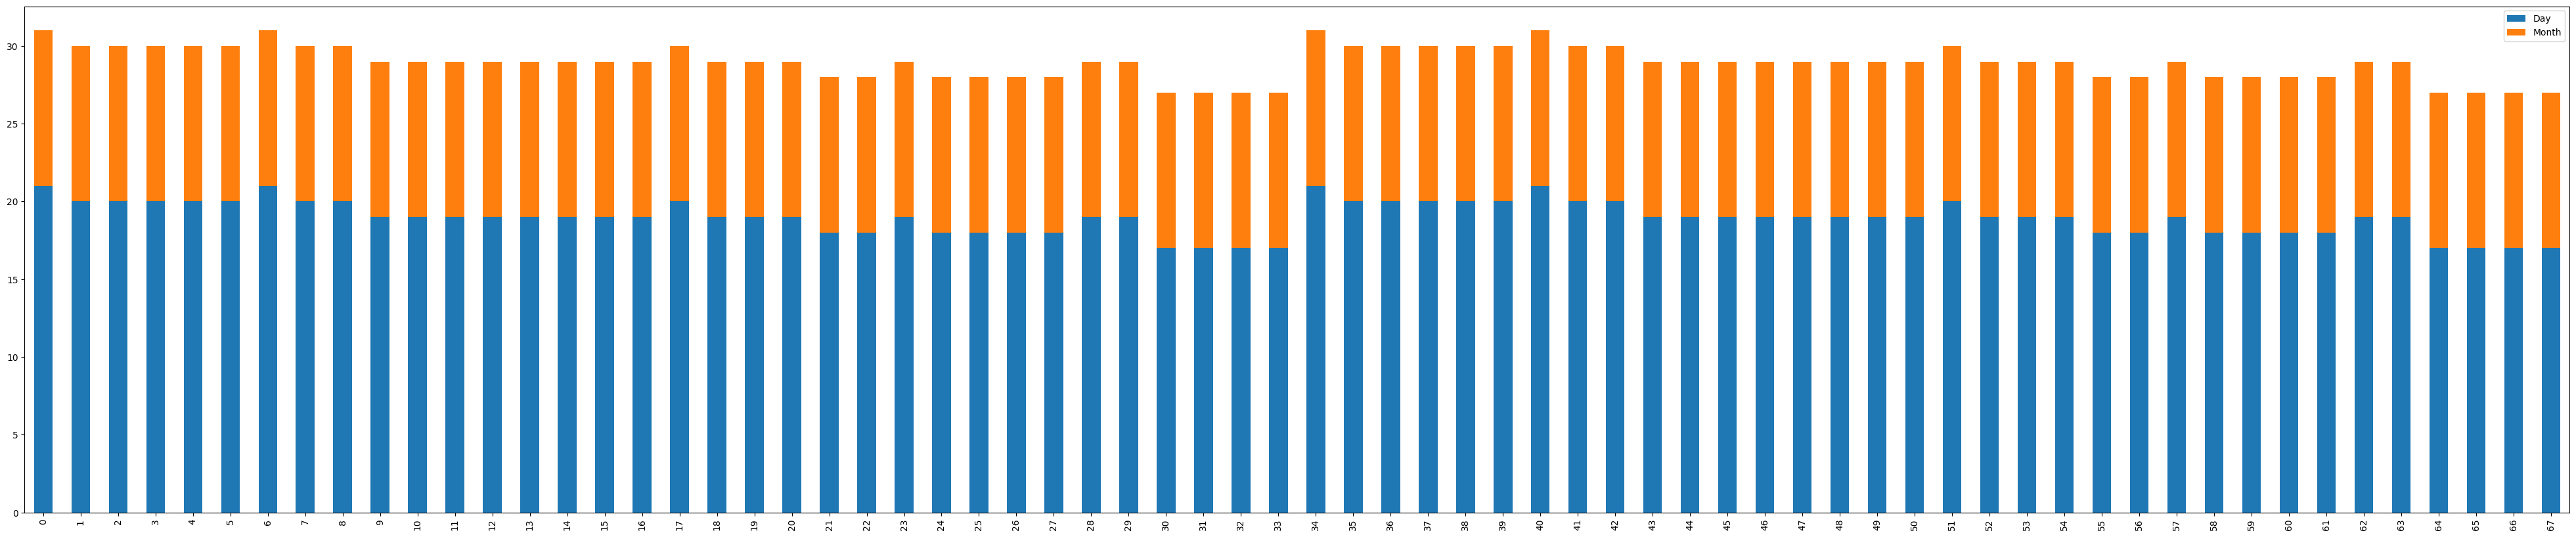

In [ ]:
df.plot.bar(stacked=True,figsize=(50,10)) # paralelno tocno pretstavauvanje , moze i kako stack so stacked=True,

<Axes: >

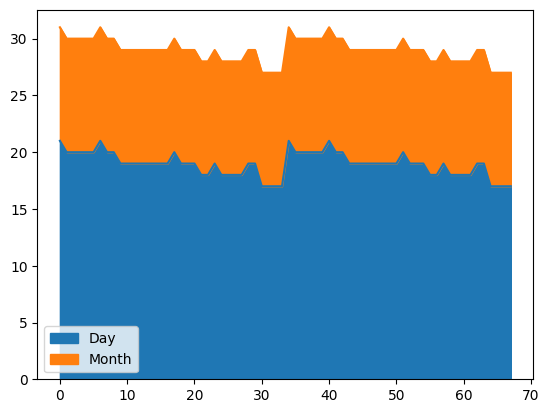

In [ ]:
df.plot.area()

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Top News finance'),
  Text(1, 0, 'Market Insider'),
  Text(2, 0, 'Tech'),
  Text(3, 0, 'Markets'),
  Text(4, 0, 'Personal Finance'),
  Text(5, 0, 'Federal Reserve'),
  Text(6, 0, 'Finance'),
  Text(7, 0, 'Top News www.cnbc.com')])

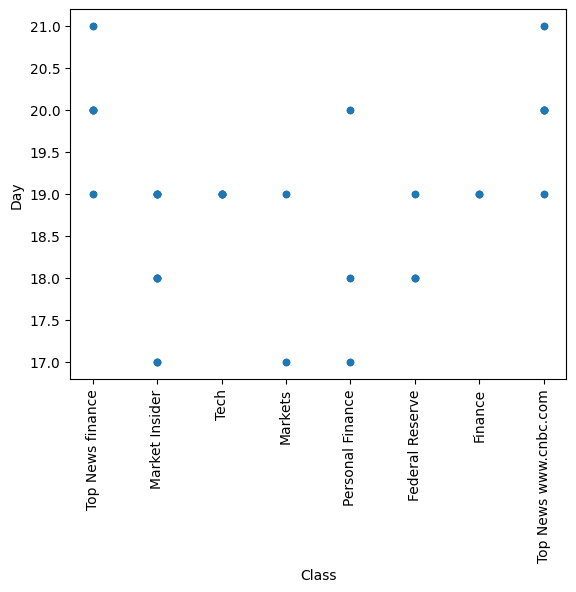

In [ ]:
df.plot.scatter(x='Class',y='Day')
plt.xticks(rotation=90)

In [ ]:
df.groupby('Class').sum()

,Day,Month
Class,,
Federal Reserve,110,60
Finance,76,40
Market Insider,328,180
Markets,72,40
Personal Finance,110,60
Tech,152,80
Top News finance,220,110
Top News www.cnbc.com,220,110


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Federal Reserve'),
  Text(1, 0, 'Finance'),
  Text(2, 0, 'Market Insider'),
  Text(3, 0, 'Markets'),
  Text(4, 0, 'Personal Finance'),
  Text(5, 0, 'Tech'),
  Text(6, 0, 'Top News finance'),
  Text(7, 0, 'Top News www.cnbc.com')])

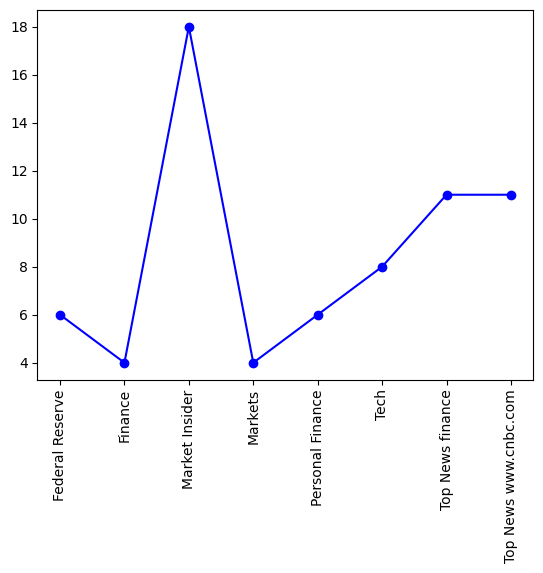

In [ ]:
plt.plot(df.groupby('Class').count().Day,'-ob')
plt.xticks(rotation=90)

<Axes: >

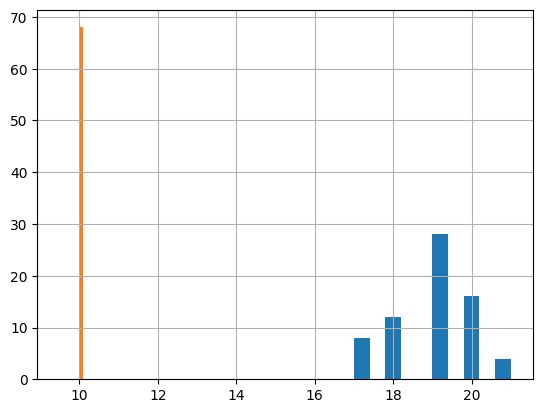

In [ ]:
df['Day'].hist()
df['Month'].hist()

In [ ]:
import seaborn as sns

<Axes: xlabel='Month', ylabel='Density'>

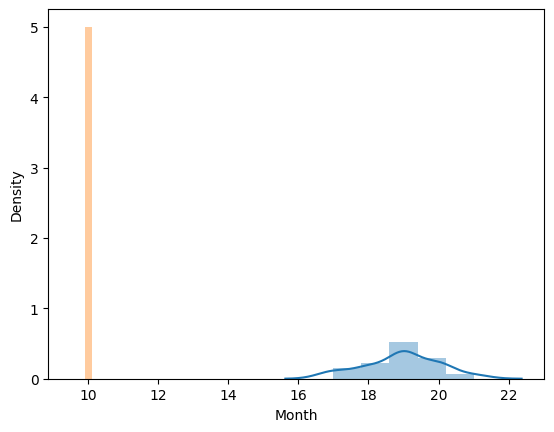

In [ ]:
sns.distplot(df['Day'],bins=5,label='Day',kde=True)
sns.distplot(df['Month'],bins=5,label='Month',kde=True)

<Axes: >

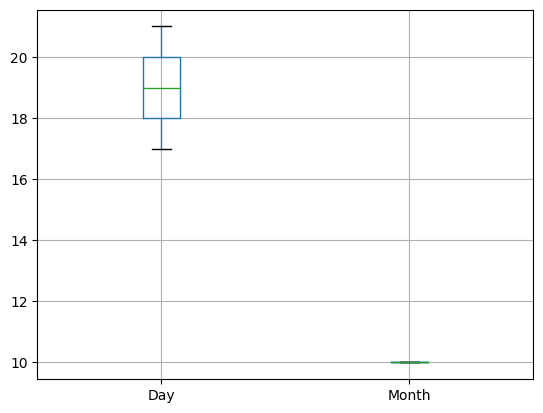

In [ ]:
df.boxplot(column=['Day','Month'])



```
# This is formatted as code
```

# AUD 4